In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from torch.optim.lr_scheduler import _LRScheduler
import seaborn as sns
import random
import numpy

In [2]:
drill_folder = 'bone_drill/'
dir_list = os.listdir(drill_folder)
dir_list

['2023drill_bone_02501w20.txt',
 '2023drill_bone_02501w30.txt',
 '2023drill_bone_02502w20.txt',
 '2023drill_bone_02502w30.txt',
 '2023drill_bone_05001w20.txt',
 '2023drill_bone_05001w30.txt',
 '2023drill_bone_05002w20.txt',
 '2023drill_bone_05002w30.txt',
 '2023drill_bone_10001w20.txt',
 '2023drill_bone_10001w30.txt',
 '2023drill_bone_10002w20.txt',
 '2023drill_bone_10002w30.txt']

In [3]:
df_all = None
for file_name in dir_list:
    df = pd.read_csv(drill_folder+dir_list[0], delimiter=' ')
    df.columns = ['X','Y','Z','A','B','C']
    if df_all is None:
        df_all = df
    else:
        df_all = pd.concat([df_all, df], axis=0)
# 打印 DataFrame 对象的前几行
df_all

,X,Y,Z,A,B,C
0,3.46329,0.079315,0.559806,-0.024670,-0.105551,-0.001545
1,3.46674,0.079827,0.550754,-0.024673,-0.105597,-0.001496
2,3.46645,0.079637,0.563992,-0.024715,-0.105558,-0.001546
3,3.46359,0.083257,0.558844,-0.024852,-0.105678,-0.001595
4,3.46658,0.080374,0.549279,-0.024929,-0.105507,-0.001521
...,...,...,...,...,...,...
165544,3.50746,0.329570,0.542392,-0.029251,-0.101631,-0.006045
165545,3.48898,0.298171,0.559844,-0.036386,-0.096771,-0.003397
165546,3.41049,0.058198,0.612573,-0.031392,-0.081524,-0.001877
165547,3.43188,0.046038,0.748454,-0.027063,-0.074382,-0.007805


In [4]:
df_ett = pd.read_csv('ETTh1.csv')
df_ett

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


# 单独实验其中的一个file

,X,Y,Z,A,B,C
0,3.46329,0.079315,0.559806,-0.024670,-0.105551,-0.001545
1,3.46674,0.079827,0.550754,-0.024673,-0.105597,-0.001496
2,3.46645,0.079637,0.563992,-0.024715,-0.105558,-0.001546
3,3.46359,0.083257,0.558844,-0.024852,-0.105678,-0.001595
4,3.46658,0.080374,0.549279,-0.024929,-0.105507,-0.001521


In [6]:
from scipy.signal import butter, filtfilt

# 设计二阶巴特沃斯低通滤波器
def butter_lowpass_filter(data, cutoff, fs, order=2):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # 应用滤波器
    filtered_data = filtfilt(b, a, data)
    return filtered_data


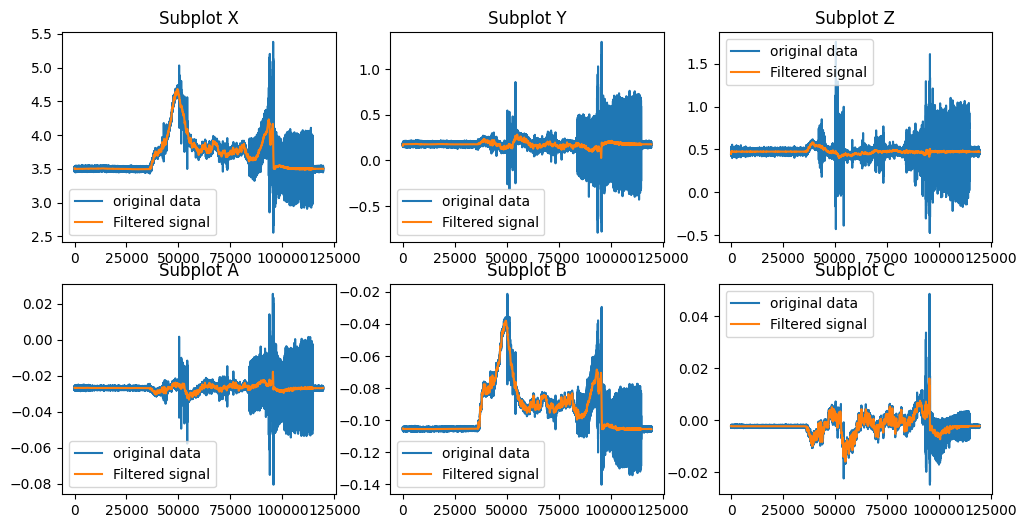

In [16]:
import numpy as np
import matplotlib.pyplot as plt
cutoff = 0.1 # 截止频率
fs = 10 # 采样率
# 读取csv
df = pd.read_csv(drill_folder+dir_list[1], delimiter=' ')
df.columns = ['X','Y','Z','A','B','C']
# 应用滤波器
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
idx = 0
for i in range(len(axs)):
    for j in range(len(axs[0])):
        filtered_data = butter_lowpass_filter(df[df.columns[idx]], cutoff, fs, order=2)
        axs[i][j].plot( df[df.columns[idx]], label='original data')
        axs[i][j].plot( filtered_data, label='Filtered signal')
        axs[i][j].set_title('Subplot {}'.format(df.columns[idx]))
        axs[i][j].legend()
        df[df.columns[idx]] = filtered_data
        idx+=1

In [ ]:
df_ett = pd.read_csv('ETTh1.csv')
plt.